# The strength of the coupling between the laser and the atom depends on the matrix element
$ d_{eg}  = e \left\langle e | r | g \right\rangle $
##### [13] H.J. Metcalf, P. van der Straten, Laser Cooling and Trapping. Springer-Verlag, New York USA (1999) 7, 9, 28

# The electric dipole moment
$ d = d_{ge} (\hat{a}^{+} + \hat{a}^{-})$, $ \hat{a}^{\pm} $은 raising, lowering operators
, $ \hat{a}^{+} = \left | e \right\rangle \left\langle g \right | , \hat{a}^{-} = \left | g \right\rangle \left\langle e \right |$

# interaction Hamiltonian
$ V_{AL} = \frac{\hbar\Omega}{2} (\hat{a}^{-} + \hat{a}^{+}) $

# Rabi frequency
$ |\Omega| = |\frac{E \cdot d}{\hbar}| $

# Atomic Hamiltonian
$ H_{A} = -\hbar \delta \hat{a}^{+} \hat{a}^{-} = -\hbar \delta \left | e \right\rangle \left\langle e \right | $

# total Hamiltonian
$ H = \frac{\hbar}{2} \begin{pmatrix} -2 \delta & \Omega \\ \Omega & 0 \end{pmatrix} $
, $ \delta = w_{e} - w_{p} $ 
##### [13] H.J. Metcalf, P. van der Straten, Laser Cooling and Trapping. Springer-Verlag, New York USA (1999) 7, 9, 28

# Initial state
$ \rho = \begin{pmatrix} \rho_{gg} &  \rho_{ge} \\ \rho_{eg} & \rho_{ee} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}$

In [1]:
# 초기에는 아무 field도 없는 atom state이기 때문에 ground에 모든 population이 있을 것이다.
import numpy as np

# Define the density matrix components
rho_gg = 1  # Probability amplitude for the ground state
rho_ee = 0  # Probability amplitude for the excited state

# Coherences (complex conjugate relationship)
rho_ge = 0  # Coherence term
rho_eg = np.conjugate(rho_ge)  # Conjugate of rho_ge

# Construct the density matrix
density_matrix = np.array([
    [rho_gg, rho_ge],
    [rho_eg, rho_ee]
], dtype=complex)

print("Density matrix ρ:")
print(density_matrix)

Density matrix ρ:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


$ \frac{d \rho}{dt} = -\frac{i}{\hbar}[H, \rho] + \mathcal{L} (\rho) $
#####  [12] C. Cohen-Tannoudji, J Dupont-Roc, G. Grynberg, Atom-Photon Interactions. Wiley Interscience publication (1992) 9

# lifetime에 의한 decoherence
$ \mathcal{L}_{se} = \begin{pmatrix} \Gamma_{e} \rho_{ee} & -\frac{1}{2} \rho_{ge} \Gamma_{e} \\ -\frac{1}{2} \Gamma_{e} \rho_{eg} & -\Gamma_{e} \rho_{ee} \end{pmatrix} $

$ \Gamma_{e}는 \left| e \right\rangle $ lifetime의 역수인 값
##### [4] J.D. Pritchard, Cooperative Optical Non-Linearity in a Blockaded Rydberg Ensemble. PhD Thesis Durham University (2011). Springer Berlin Heidelberg, Springer Thesis series (2012) 9, 13, 15, 17
##### [11] G. Lindblad, On the Generators of Quantum Dynamical Semigroups, Commun. math. Phys. 48 (1976) 9

# laser의 선폭에 의한 decoherence
$ \mathcal{L}_{lw} = \begin{pmatrix} 0 & -\gamma_{p} \rho_{ge} \\ -\gamma_{p} \rho_{eg} & 0 \end{pmatrix} $

$ \gamma_{p} $ 는 레이저의 선폭

# Optical Bloch Equation(OBE)
$ \frac{d \rho}{dt} = -\frac{i}{\hbar}[H, \rho] + \mathcal{L}_{se} (\rho) + \mathcal{L}_{lw} (\rho) $

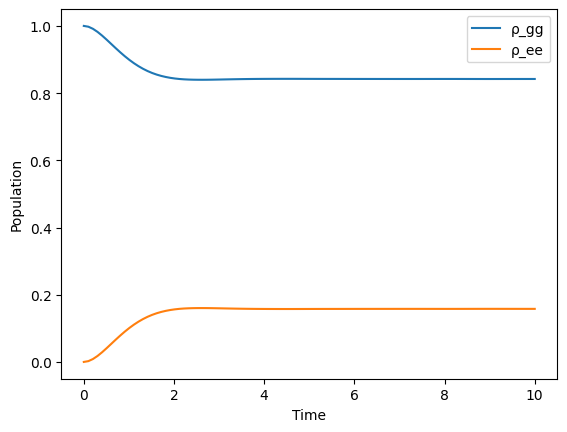

In [11]:
import numpy as np
from scipy.integrate import solve_ivp

# Define constants and parameters
hbar = 1.0545718e-34  # Reduced Planck's constant in Js
delta = 1.0  # Detuning in appropriate units
Omega = 1.0  # Rabi frequency in appropriate units
Gamma_e = 1.0  # Spontaneous emission rate in appropriate units
gamma_p = 1.0  # Dephasing rate in appropriate units

# Define the Hamiltonian H
H = (hbar / 2) * np.array([
    [-2 * delta, Omega],
    [Omega, 0]
], dtype=complex)

# Initial density matrix (pure ground state)
rho_0 = np.array([1, 0, 0, 0], dtype=complex)  # Flattened as [ρ_gg, ρ_ge, ρ_eg, ρ_ee]

def commutator(A, B):
    return np.dot(A, B) - np.dot(B, A)

def lindblad_se(rho):
    rho_ee = rho[3]
    rho_ge = rho[1]
    rho_eg = rho[2]
    L_se = np.array([
        [Gamma_e * rho_ee, -0.5 * Gamma_e * rho_ge],
        [-0.5 * Gamma_e * rho_eg, -Gamma_e * rho_ee]
    ], dtype=complex)
    return L_se

def lindblad_lw(rho):
    rho_ge = rho[1]
    rho_eg = rho[2]
    L_lw = np.array([
        [0, -gamma_p * rho_ge],
        [-gamma_p * rho_eg, 0]
    ], dtype=complex)
    return L_lw

def rho_to_matrix(rho):
    return np.array([
        [rho[0], rho[1]],
        [rho[2], rho[3]]
    ], dtype=complex)

def matrix_to_rho(matrix):
    return np.array([
        matrix[0, 0], matrix[0, 1],
        matrix[1, 0], matrix[1, 1]
    ], dtype=complex)

def obes(t, rho):
    rho_matrix = rho_to_matrix(rho)
    comm = commutator(H, rho_matrix)
    L_se = lindblad_se(rho)
    L_lw = lindblad_lw(rho)
    
    d_rho_matrix = (-1j / hbar) * comm + L_se + L_lw
    return matrix_to_rho(d_rho_matrix)

# Solve the ODEs
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)
sol = solve_ivp(obes, t_span, rho_0, t_eval=t_eval, method='RK45')

# Extract and plot the results
import matplotlib.pyplot as plt

rho_gg = sol.y[0].real
rho_ee = sol.y[3].real

plt.plot(sol.t, rho_gg, label='ρ_gg')
plt.plot(sol.t, rho_ee, label='ρ_ee')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


$ \frac{d \rho}{dt} = -\frac{i}{\hbar}[H, \rho] + \mathcal{L}_{se} (\rho) + \mathcal{L}_{lw} (\rho) $, 
$ H = \frac{\hbar}{2} \begin{pmatrix} -2 \delta & \Omega \\ \Omega & 0 \end{pmatrix} $, 
$ \rho = \begin{pmatrix} \rho_{gg} &  \rho_{eg} \\ \rho_{ge} & \rho_{ee} \end{pmatrix} $, 
$ \mathcal{L}_{se} = \begin{pmatrix} \Gamma_{e} \rho_{ee} & -\frac{1}{2} \rho_{ge} \Gamma_{e} \\ -\frac{1}{2} \Gamma_{e} \rho_{eg} & -\Gamma_{e} \rho_{ee} \end{pmatrix} $, 
$ \mathcal{L}_{lw} = \begin{pmatrix} 0 & -\gamma_{p} \rho_{ge} \\ -\gamma_{p} \rho_{eg} & 0 \end{pmatrix} $

In [44]:
import sympy as sp

# LaTeX 출력을 위한 설정
sp.init_printing(use_latex='mathjax')

# 심볼 정의
hbar, delta_p, Omega_p, Gamma_e, gamma_p = sp.symbols('hbar delta_p Omega_p Gamma_e gamma_p')
rho_gg, rho_ge, rho_eg, rho_ee = sp.symbols('rho_gg rho_ge rho_eg rho_ee')

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_eg], [rho_ge, rho_ee]])

# 해밀토니안 정의
H = (hbar / 2) * sp.Matrix([[-2 * delta_p, Omega_p], [Omega_p, 0]])
# 논문을 보면 atomic Hamiltonian은 -hbar * delta_p |e><e| 임을 알 수가 있는데 왜인지 (1.1)자리에 위치하고 있다.

# [H, rho] 계산
commutator = H * rho - rho * H

# Lindblad 연산자 정의
L_se = sp.Matrix([[Gamma_e * rho_ee, -0.5 * Gamma_e * rho_ge],
                  [-0.5 * Gamma_e * rho_eg, -Gamma_e * rho_ee]])

L_lw = sp.Matrix([[0, -gamma_p * rho_ge], [-gamma_p * rho_eg, 0]])

# Optical Bloch Equations
drho_dt = -1j / hbar * commutator + L_se + L_lw

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
steady_state_eqns = [sp.Eq(drho_dt[i, j], 0) for i in range(2) for j in range(2)]

# 밀도 행렬의 특성 추가: 추적값이 1
steady_state_eqns.append(sp.Eq(rho_gg + rho_ee, 1))

# 정상 상태 방정식 풀기
steady_state_solution = sp.solve(steady_state_eqns, (rho_gg, rho_ge, rho_eg, rho_ee), dict=True)

# 정상 상태 해가 있는지 확인
if steady_state_solution:
    steady_state_solution = steady_state_solution[0]

    # 해를 간단히 정리
    steady_state_solution_simplified = {k: sp.simplify(v) for k, v in steady_state_solution.items()}

    # LaTeX 출력 생성
    latex_output = sp.latex(steady_state_solution_simplified)

    # 결과 출력
    print("Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:")
    print(latex_output)

    # LaTeX 형식으로 표시
    for var, sol in steady_state_solution_simplified.items():
        display(sp.Eq(var, sol))
else:
    print("정상 상태 해를 찾을 수 없습니다.")


Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:
\left\{ \rho_{ee} : \frac{\Omega_{p}^{2} \left(- \Gamma_{e} - 2.0 \gamma_{p}\right)}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} - 2.0 \Gamma_{e} \Omega_{p}^{2} - 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} - 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{eg} : \frac{\Gamma_{e} \Omega_{p} \left(- i \Gamma_{e} + 2.0 \delta_{p} - 2.0 i \gamma_{p}\right)}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} - 2.0 \Gamma_{e} \Omega_{p}^{2} - 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} - 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{ge} : \frac{\Gamma_{e} \Omega_{p} \left(i \Gamma_{e} + 2.0 \delta_{p} + 2.0 i \gamma_{p}\right)}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} - 2.0 \Gamma_{e} \Omega_{p}^{2} - 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} - 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{gg} : \frac{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} - \Gamma_{e} \Omega_{p}^{2} - 4.0 \Gamma_{e} \delta_{p}^{2

                                 2                                        
                               Ωₚ ⋅(-Γₑ - 2.0⋅γₚ)                         
ρₑₑ = ────────────────────────────────────────────────────────────────────
        3         2               2            2            2         2   
      Γₑ  + 4.0⋅Γₑ ⋅γₚ - 2.0⋅Γₑ⋅Ωₚ  - 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  - 4.0⋅Ωₚ ⋅γₚ

                        Γₑ⋅Ωₚ⋅(-ⅈ⋅Γₑ + 2.0⋅δₚ - 2.0⋅ⅈ⋅γₚ)                  
ρ_eg = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ - 2.0⋅Γₑ⋅Ωₚ  - 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  - 4.0⋅Ωₚ ⋅γₚ

                         Γₑ⋅Ωₚ⋅(ⅈ⋅Γₑ + 2.0⋅δₚ + 2.0⋅ⅈ⋅γₚ)                  
ρ_ge = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ - 2.0⋅Γₑ⋅Ωₚ  - 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  - 4.0⋅Ωₚ ⋅γₚ

           3         2           2            2            2         2     
         Γₑ  + 4.0⋅Γₑ ⋅γₚ - Γₑ⋅Ωₚ  - 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  - 2.0⋅Ωₚ ⋅γₚ  
ρ_gg = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ - 2.0⋅Γₑ⋅Ωₚ  - 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  - 4.0⋅Ωₚ ⋅γₚ

In [40]:
import sympy as sp

# LaTeX 출력을 위한 설정
sp.init_printing(use_latex='mathjax')

# 심볼 정의
hbar, delta_p, Omega_p, Gamma_e, gamma_p = sp.symbols('hbar delta_p Omega_p Gamma_e gamma_p')
rho_gg, rho_ge, rho_eg, rho_ee = sp.symbols('rho_gg rho_ge rho_eg rho_ee')

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_ge], [rho_eg, rho_ee]])

# 해밀토니안 정의
H = (hbar / 2) * sp.Matrix([[-2 * delta_p, Omega_p], [Omega_p, 0]])

# [H, rho] 계산
commutator = H * rho - rho * H

# Lindblad 연산자 정의
L_se = sp.Matrix([[Gamma_e * rho_ee, -0.5 * Gamma_e * rho_ge],
                  [-0.5 * Gamma_e * rho_eg, -Gamma_e * rho_ee]])

L_lw = sp.Matrix([[0, -gamma_p * rho_ge], [-gamma_p * rho_eg, 0]])

# Optical Bloch Equations
drho_dt = -1j / hbar * commutator + L_se + L_lw

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
steady_state_eqns = [sp.Eq(drho_dt[i, j], 0) for i in range(2) for j in range(2)]

# 밀도 행렬의 특성 추가: 추적값이 1
steady_state_eqns.append(sp.Eq(rho_gg + rho_ee, 1))

# 정상 상태 방정식 풀기
steady_state_solution = sp.solve(steady_state_eqns, (rho_gg, rho_ge, rho_eg, rho_ee), dict=True)

# 정상 상태 해가 있는지 확인
if steady_state_solution:
    steady_state_solution = steady_state_solution[0]

    # 해를 간단히 정리하지 않음
    # LaTeX 출력 생성
    latex_output = sp.latex(steady_state_solution)

    # 결과 출력
    print("Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:")
    print(latex_output)

    # LaTeX 형식으로 표시
    for var, sol in steady_state_solution.items():
        display(sp.Eq(var, sol))
else:
    print("정상 상태 해를 찾을 수 없습니다.")


Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:
\left\{ \rho_{ee} : \frac{\Gamma_{e} \Omega_{p}^{2} + 2.0 \Omega_{p}^{2} \gamma_{p}}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + 2.0 \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} + 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{eg} : \frac{- i \Gamma_{e}^{2} \Omega_{p} - 2.0 \Gamma_{e} \Omega_{p} \delta_{p} - 2.0 i \Gamma_{e} \Omega_{p} \gamma_{p}}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + 2.0 \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} + 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{ge} : \frac{i \Gamma_{e}^{2} \Omega_{p} - 2.0 \Gamma_{e} \Omega_{p} \delta_{p} + 2.0 i \Gamma_{e} \Omega_{p} \gamma_{p}}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + 2.0 \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} + 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{gg} : \frac{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + \Gamma_{

                                   2         2                            
                              Γₑ⋅Ωₚ  + 2.0⋅Ωₚ ⋅γₚ                         
ρₑₑ = ────────────────────────────────────────────────────────────────────
        3         2               2            2            2         2   
      Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

                          2                                                
                    - ⅈ⋅Γₑ ⋅Ωₚ - 2.0⋅Γₑ⋅Ωₚ⋅δₚ - 2.0⋅ⅈ⋅Γₑ⋅Ωₚ⋅γₚ             
ρ_eg = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

                         2                                                 
                     ⅈ⋅Γₑ ⋅Ωₚ - 2.0⋅Γₑ⋅Ωₚ⋅δₚ + 2.0⋅ⅈ⋅Γₑ⋅Ωₚ⋅γₚ              
ρ_ge = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

           3         2           2            2            2         2     
         Γₑ  + 4.0⋅Γₑ ⋅γₚ + Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 2.0⋅Ωₚ ⋅γₚ  
ρ_gg = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

논문과는 다른 $ \rho_{eg} $ 값을 보임

$ \frac{d \rho}{dt} = -\frac{i}{\hbar}[H, \rho] + \mathcal{L}_{se} (\rho) + \mathcal{L}_{lw} (\rho) $, 
$ H = \frac{\hbar}{2} \begin{pmatrix} 0 & \Omega \\ \Omega & -2 \delta \end{pmatrix} $, 
$ \rho = \begin{pmatrix} \rho_{gg} &  \rho_{ge} \\ \rho_{eg} & \rho_{ee} \end{pmatrix} $, 
$ \mathcal{L}_{se} = \begin{pmatrix} -\Gamma_{e} \rho_{ee} & -\frac{1}{2} \rho_{ge} \Gamma_{e} \\ -\frac{1}{2} \Gamma_{e} \rho_{eg} & \Gamma_{e} \rho_{ee} \end{pmatrix} $, 
$ \mathcal{L}_{lw} = \begin{pmatrix} 0 & -\gamma_{p} \rho_{ge} \\ -\gamma_{p} \rho_{eg} & 0 \end{pmatrix} $

In [58]:
import sympy as sp

# LaTeX 출력을 위한 설정
sp.init_printing(use_latex='mathjax')

# 심볼 정의
hbar, delta_p, Omega_p, Gamma_e, gamma_p = sp.symbols('hbar delta_p Omega_p Gamma_e gamma_p')
rho_gg, rho_ge, rho_eg, rho_ee = sp.symbols('rho_gg rho_ge rho_eg rho_ee')

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_ge], [rho_eg, rho_ee]])

# 해밀토니안 정의
H = (hbar / 2) * sp.Matrix([[0, Omega_p], [Omega_p, -2 * delta_p]])
# 논문을 보면 atomic Hamiltonian은 -hbar * delta_p |e><e| 임을 알 수가 있는데 왜인지 (1.1)자리에 위치하고 있다.

# [H, rho] 계산
commutator = H * rho - rho * H

# Lindblad 연산자 정의
L_se =  sp.Matrix([[-Gamma_e * rho_ee, 0.5 * Gamma_e * rho_ge],
                  [0.5 * Gamma_e * rho_eg, Gamma_e * rho_ee]])

L_lw = sp.Matrix([[0, gamma_p * rho_ge], [gamma_p * rho_eg, 0]])

# Optical Bloch Equations
drho_dt = 1j / hbar * commutator - L_se - L_lw

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
steady_state_eqns = [sp.Eq(drho_dt[i, j], 0) for i in range(2) for j in range(2)]

# 밀도 행렬의 특성 추가: 추적값이 1
steady_state_eqns.append(sp.Eq(rho_gg + rho_ee, 1))

# 정상 상태 방정식 풀기
steady_state_solution = sp.solve(steady_state_eqns, (rho_gg, rho_ge, rho_eg, rho_ee), dict=True)

# 정상 상태 해가 있는지 확인
if steady_state_solution:
    steady_state_solution = steady_state_solution[0]

    # 해를 간단히 정리
    steady_state_solution_simplified = {k: sp.simplify(v) for k, v in steady_state_solution.items()}

    # LaTeX 출력 생성
    latex_output = sp.latex(steady_state_solution_simplified)

    # 결과 출력
    print("Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:")
    print(latex_output)

    # LaTeX 형식으로 표시
    for var, sol in steady_state_solution_simplified.items():
        display(sp.Eq(var, sol))
else:
    print("정상 상태 해를 찾을 수 없습니다.")

display(rho)
display(H)
display(commutator)
display(L_se)
display(L_lw)
display(drho_dt[0])
display(drho_dt[1])
display(drho_dt[2])
display(drho_dt[3])

Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:
\left\{ \rho_{ee} : \frac{\Omega_{p}^{2} \left(\Gamma_{e} + 2.0 \gamma_{p}\right)}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + 2.0 \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} + 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{eg} : \frac{\Gamma_{e} \Omega_{p} \left(i \Gamma_{e} + 2.0 \delta_{p} + 2.0 i \gamma_{p}\right)}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + 2.0 \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} + 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{ge} : \frac{\Gamma_{e} \Omega_{p} \left(- i \Gamma_{e} + 2.0 \delta_{p} - 2.0 i \gamma_{p}\right)}{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + 2.0 \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} + 4.0 \Gamma_{e} \gamma_{p}^{2} + 4.0 \Omega_{p}^{2} \gamma_{p}}, \  \rho_{gg} : \frac{\Gamma_{e}^{3} + 4.0 \Gamma_{e}^{2} \gamma_{p} + \Gamma_{e} \Omega_{p}^{2} + 4.0 \Gamma_{e} \delta_{p}^{2} 

                                 2                                        
                               Ωₚ ⋅(Γₑ + 2.0⋅γₚ)                          
ρₑₑ = ────────────────────────────────────────────────────────────────────
        3         2               2            2            2         2   
      Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

                         Γₑ⋅Ωₚ⋅(ⅈ⋅Γₑ + 2.0⋅δₚ + 2.0⋅ⅈ⋅γₚ)                  
ρ_eg = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

                        Γₑ⋅Ωₚ⋅(-ⅈ⋅Γₑ + 2.0⋅δₚ - 2.0⋅ⅈ⋅γₚ)                  
ρ_ge = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

           3         2           2            2            2         2     
         Γₑ  + 4.0⋅Γₑ ⋅γₚ + Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 2.0⋅Ωₚ ⋅γₚ  
ρ_gg = ────────────────────────────────────────────────────────────────────
         3         2               2            2            2         2   
       Γₑ  + 4.0⋅Γₑ ⋅γₚ + 2.0⋅Γₑ⋅Ωₚ  + 4.0⋅Γₑ⋅δₚ  + 4.0⋅Γₑ⋅γₚ  + 4.0⋅Ωₚ ⋅γₚ

⎡ρ_gg  ρ_ge⎤
⎢          ⎥
⎣ρ_eg  ρₑₑ ⎦

⎡      Ωₚ⋅h̅ ⎤
⎢ 0    ──── ⎥
⎢       2   ⎥
⎢           ⎥
⎢Ωₚ⋅h̅       ⎥
⎢────  -δₚ⋅h̅⎥
⎣ 2         ⎦

⎡      Ωₚ⋅h̅⋅ρ_eg   Ωₚ⋅h̅⋅ρ_ge         Ωₚ⋅h̅⋅ρₑₑ   Ωₚ⋅h̅⋅ρ_gg            ⎤
⎢      ───────── - ─────────         ──────── - ───────── + δₚ⋅h̅⋅ρ_ge⎥
⎢          2           2                2           2                ⎥
⎢                                                                    ⎥
⎢  Ωₚ⋅h̅⋅ρₑₑ   Ωₚ⋅h̅⋅ρ_gg                    Ωₚ⋅h̅⋅ρ_eg   Ωₚ⋅h̅⋅ρ_ge     ⎥
⎢- ──────── + ───────── - δₚ⋅h̅⋅ρ_eg      - ───────── + ─────────     ⎥
⎣     2           2                            2           2         ⎦

⎡  -Γₑ⋅ρₑₑ    0.5⋅Γₑ⋅ρ_ge⎤
⎢                        ⎥
⎣0.5⋅Γₑ⋅ρ_eg    Γₑ⋅ρₑₑ   ⎦

⎡   0     γₚ⋅ρ_ge⎤
⎢                ⎥
⎣γₚ⋅ρ_eg     0   ⎦

               ⎛Ωₚ⋅h̅⋅ρ_eg   Ωₚ⋅h̅⋅ρ_ge⎞
         1.0⋅ⅈ⋅⎜───────── - ─────────⎟
               ⎝    2           2    ⎠
Γₑ⋅ρₑₑ + ─────────────────────────────
                       h̅             

                               ⎛Ωₚ⋅h̅⋅ρₑₑ   Ωₚ⋅h̅⋅ρ_gg            ⎞
                         1.0⋅ⅈ⋅⎜──────── - ───────── + δₚ⋅h̅⋅ρ_ge⎟
                               ⎝   2           2                ⎠
-0.5⋅Γₑ⋅ρ_ge - γₚ⋅ρ_ge + ────────────────────────────────────────
                                            h̅                   

                               ⎛  Ωₚ⋅h̅⋅ρₑₑ   Ωₚ⋅h̅⋅ρ_gg            ⎞
                         1.0⋅ⅈ⋅⎜- ──────── + ───────── - δₚ⋅h̅⋅ρ_eg⎟
                               ⎝     2           2                ⎠
-0.5⋅Γₑ⋅ρ_eg - γₚ⋅ρ_eg + ──────────────────────────────────────────
                                             h̅                    

                ⎛  Ωₚ⋅h̅⋅ρ_eg   Ωₚ⋅h̅⋅ρ_ge⎞
          1.0⋅ⅈ⋅⎜- ───────── + ─────────⎟
                ⎝      2           2    ⎠
-Γₑ⋅ρₑₑ + ───────────────────────────────
                         h̅              

In [10]:
# laser finite line width로 인한 dephasing 성분이 없는 경우
import sympy as sp

# LaTeX 출력을 위한 설정
sp.init_printing(use_latex='mathjax')

# 심볼 정의
hbar, delta_p, Omega, Gamma = sp.symbols('hbar delta_p Omega Gamma')
rho_gg, rho_ge, rho_eg, rho_ee = sp.symbols('rho_gg rho_ge rho_eg rho_ee')

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_ge], [rho_eg, rho_ee]])

# 해밀토니안 정의
H = (hbar / 2) * sp.Matrix([[0, Omega], [Omega, -2 * delta_p]])
# 논문을 보면 atomic Hamiltonian은 -hbar * delta_p |e><e| 임을 알 수가 있는데 왜인지 (1.1)자리에 위치하고 있다.

# [H, rho] 계산
commutator = H * rho - rho * H

# Lindblad 연산자 정의
L_se =  sp.Matrix([[Gamma * rho_ee, -0.5 * Gamma * rho_ge],
                  [-0.5 * Gamma * rho_eg, -Gamma * rho_ee]])

# L_lw = sp.Matrix([[0, gamma_p * rho_ge], [gamma_p * rho_eg, 0]])

# Optical Bloch Equations
drho_dt = -1j / hbar * commutator + L_se#  - L_lw

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
steady_state_eqns = [sp.Eq(drho_dt[i, j], 0) for i in range(2) for j in range(2)]

# 밀도 행렬의 특성 추가: 추적값이 1
steady_state_eqns.append(sp.Eq(rho_gg + rho_ee, 1))

# 정상 상태 방정식 풀기
steady_state_solution = sp.solve(steady_state_eqns, (rho_gg, rho_ge, rho_eg, rho_ee), dict=True)

# 정상 상태 해가 있는지 확인
if steady_state_solution:
    steady_state_solution = steady_state_solution[0]

    # 해를 간단히 정리
    steady_state_solution_simplified = {k: sp.simplify(v) for k, v in steady_state_solution.items()}

    # LaTeX 출력 생성
    latex_output = sp.latex(steady_state_solution_simplified)

    # 결과 출력
    print("Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:")
    print(latex_output)

    # LaTeX 형식으로 표시
    for var, sol in steady_state_solution_simplified.items():
        display(sp.Eq(var, sol))
else:
    print("정상 상태 해를 찾을 수 없습니다.")

display(rho)
display(H)
display(commutator)
display(L_se)
# display(L_lw)
display(drho_dt[0])
display(drho_dt[1])
display(drho_dt[2])
display(drho_dt[3])

Optical Bloch Equations의 정상 상태 해의 LaTeX 형식:
\left\{ \rho_{ee} : \frac{\Omega^{2}}{\Gamma^{2} + 2.0 \Omega^{2} + 4.0 \delta_{p}^{2}}, \  \rho_{eg} : \frac{\Omega \left(- i \Gamma + 2.0 \delta_{p}\right)}{\Gamma^{2} + 2.0 \Omega^{2} + 4.0 \delta_{p}^{2}}, \  \rho_{ge} : \frac{\Omega \left(i \Gamma + 2.0 \delta_{p}\right)}{\Gamma^{2} + 2.0 \Omega^{2} + 4.0 \delta_{p}^{2}}, \  \rho_{gg} : \frac{\Gamma^{2} + \Omega^{2} + 4.0 \delta_{p}^{2}}{\Gamma^{2} + 2.0 \Omega^{2} + 4.0 \delta_{p}^{2}}\right\}


                 2         
                Ω          
ρₑₑ = ─────────────────────
       2        2         2
      Γ  + 2.0⋅Ω  + 4.0⋅δₚ 

         Ω⋅(-ⅈ⋅Γ + 2.0⋅δₚ)  
ρ_eg = ─────────────────────
        2        2         2
       Γ  + 2.0⋅Ω  + 4.0⋅δₚ 

          Ω⋅(ⅈ⋅Γ + 2.0⋅δₚ)  
ρ_ge = ─────────────────────
        2        2         2
       Γ  + 2.0⋅Ω  + 4.0⋅δₚ 

          2    2         2  
         Γ  + Ω  + 4.0⋅δₚ   
ρ_gg = ─────────────────────
        2        2         2
       Γ  + 2.0⋅Ω  + 4.0⋅δₚ 

⎡ρ_gg  ρ_ge⎤
⎢          ⎥
⎣ρ_eg  ρₑₑ ⎦

⎡      Ω⋅h̅ ⎤
⎢ 0    ─── ⎥
⎢       2  ⎥
⎢          ⎥
⎢Ω⋅h̅       ⎥
⎢───  -δₚ⋅h̅⎥
⎣ 2        ⎦

⎡      Ω⋅h̅⋅ρ_eg   Ω⋅h̅⋅ρ_ge         Ω⋅h̅⋅ρₑₑ   Ω⋅h̅⋅ρ_gg            ⎤
⎢      ──────── - ────────         ─────── - ──────── + δₚ⋅h̅⋅ρ_ge⎥
⎢         2          2                2         2                ⎥
⎢                                                                ⎥
⎢  Ω⋅h̅⋅ρₑₑ   Ω⋅h̅⋅ρ_gg                    Ω⋅h̅⋅ρ_eg   Ω⋅h̅⋅ρ_ge     ⎥
⎢- ─────── + ──────── - δₚ⋅h̅⋅ρ_eg      - ──────── + ────────     ⎥
⎣     2         2                           2          2         ⎦

⎡   Γ⋅ρₑₑ     -0.5⋅Γ⋅ρ_ge⎤
⎢                        ⎥
⎣-0.5⋅Γ⋅ρ_eg    -Γ⋅ρₑₑ   ⎦

          ⎛Ω⋅h̅⋅ρ_eg   Ω⋅h̅⋅ρ_ge⎞
        ⅈ⋅⎜──────── - ────────⎟
          ⎝   2          2    ⎠
Γ⋅ρₑₑ - ───────────────────────
                   h̅          

                ⎛Ω⋅h̅⋅ρₑₑ   Ω⋅h̅⋅ρ_gg            ⎞
              ⅈ⋅⎜─────── - ──────── + δₚ⋅h̅⋅ρ_ge⎟
                ⎝   2         2                ⎠
-0.5⋅Γ⋅ρ_ge - ──────────────────────────────────
                              h̅                

                ⎛  Ω⋅h̅⋅ρₑₑ   Ω⋅h̅⋅ρ_gg            ⎞
              ⅈ⋅⎜- ─────── + ──────── - δₚ⋅h̅⋅ρ_eg⎟
                ⎝     2         2                ⎠
-0.5⋅Γ⋅ρ_eg - ────────────────────────────────────
                               h̅                 

           ⎛  Ω⋅h̅⋅ρ_eg   Ω⋅h̅⋅ρ_ge⎞
         ⅈ⋅⎜- ──────── + ────────⎟
           ⎝     2          2    ⎠
-Γ⋅ρₑₑ - ─────────────────────────
                     h̅           

In [12]:
import sympy as sp

# LaTeX 출력을 위한 설정
sp.init_printing(use_latex='mathjax')

# 심볼 정의
N, V, d_eg, omega_p, t, hbar, Omega = sp.symbols('N V d_eg omega_p t hbar Omega')
epsilon_0, E_p, chi = sp.symbols('epsilon_0 E_p chi')
rho_eg = sp.symbols('rho_eg', complex=True)

# Rabi frequency를 이용하여 E_p 표현
E_p = Omega * hbar / d_eg

# 밀도 \(\frac{N}{V}\) 계산
N_over_V = N / V

# Polarization P 계산 (식 2.28)
P = -N_over_V * (d_eg * rho_eg * sp.exp(-sp.I * omega_p * t) + sp.conjugate(d_eg * rho_eg * sp.exp(-sp.I * omega_p * t)))

# 전기장의 Polarization P (식 2.30)
P_electric_field = (1 / 2) * epsilon_0 * E_p * (chi * sp.exp(-sp.I * omega_p * t) + sp.conjugate(chi * sp.exp(-sp.I * omega_p * t)))

# E_p를 대입
P_electric_field = P_electric_field.subs(E_p, Omega * hbar / d_eg)

# P^2 계산
P_squared = P**2
P_electric_field_squared = P_electric_field**2

# 전기 감수율 χ 계산
chi_expression = sp.solve(sp.Eq(P_squared, P_electric_field_squared), chi)[0]

# LaTeX 출력 생성
latex_P = sp.latex(P)
latex_P_electric_field = sp.latex(P_electric_field)
latex_chi = sp.latex(chi_expression)

# 결과 출력
print("극화 P의 LaTeX 형식:")
print(latex_P)
print("전기장의 극화 P의 LaTeX 형식:")
print(latex_P_electric_field)
print("전기 감수율 χ의 LaTeX 형식:")
print(latex_chi)

# LaTeX 형식으로 표시
display(P)
display(P_electric_field)
display(chi_expression)


극화 P의 LaTeX 형식:
- \frac{N \left(d_{eg} \rho_{eg} e^{- i \omega_{p} t} + e^{i \overline{\omega_{p}} \overline{t}} \overline{d_{eg}} \overline{\rho_{eg}}\right)}{V}
전기장의 극화 P의 LaTeX 형식:
\frac{0.5 \Omega \epsilon_{0} \hbar \left(\chi e^{- i \omega_{p} t} + e^{i \overline{\omega_{p}} \overline{t}} \overline{\chi}\right)}{d_{eg}}
전기 감수율 χ의 LaTeX 형식:
- \frac{2.0 N d_{eg}^{2} \rho_{eg}}{\Omega V \epsilon_{0} \hbar}


   ⎛                        __ _          ⎞ 
   ⎜           -ⅈ⋅ωₚ⋅t    ⅈ⋅ωₚ⋅t ____ ____⎟ 
-N⋅⎝d_eg⋅ρ_eg⋅ℯ        + ℯ      ⋅d_eg⋅ρ_eg⎠ 
────────────────────────────────────────────
                     V                      

           ⎛                __ _  ⎞
           ⎜   -ⅈ⋅ωₚ⋅t    ⅈ⋅ωₚ⋅t _⎟
0.5⋅Ω⋅ε₀⋅h̅⋅⎝χ⋅ℯ        + ℯ      ⋅χ⎠
───────────────────────────────────
                d_eg               

           2      
-2.0⋅N⋅d_eg ⋅ρ_eg 
──────────────────
    Ω⋅V⋅ε₀⋅h̅     

In [13]:
import numpy as np
import sympy as sp

# 변수 값 설정
hbar = 1.0545718e-34  # 플랑크 상수 (J·s)
delta_p = 1e6  # 디튜닝 값 (Hz)
Omega_p = 1e6  # Rabi 주파수 (Hz)
Gamma_e = 1e7  # 붕괴율 (Hz)
gamma_p = 1e3  # 상호작용 탈상관율 (Hz)

# 밀도 행렬 초기화
rho_gg = sp.Symbol('rho_gg', real=True)
rho_ge = sp.Symbol('rho_ge', complex=True)
rho_eg = sp.Symbol('rho_eg', complex=True)
rho_ee = sp.Symbol('rho_ee', real=True)

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_ge], [rho_eg, rho_ee]])

# 해밀토니안 정의
H = (hbar / 2) * sp.Matrix([[-2 * delta_p, Omega_p], [Omega_p, 0]])

# [H, rho] 계산
commutator = H * rho - rho * H

# Lindblad 연산자 정의
L_se = sp.Matrix([[Gamma_e * rho_ee, -0.5 * Gamma_e * rho_ge],
                  [-0.5 * Gamma_e * rho_eg, -Gamma_e * rho_ee]])

L_lw = sp.Matrix([[0, -gamma_p * rho_ge], [-gamma_p * rho_eg, 0]])

# Optical Bloch Equations
drho_dt = -1j / hbar * commutator + L_se + L_lw

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
steady_state_eqns = [
    sp.Eq(drho_dt[0, 0], 0),
    sp.Eq(drho_dt[0, 1], 0),
    sp.Eq(drho_dt[1, 0], 0),
    sp.Eq(drho_dt[1, 1], 0),
    sp.Eq(rho_gg + rho_ee, 1)
]

# 정상 상태 방정식 풀기
steady_state_solution = sp.solve(steady_state_eqns, (rho_gg, rho_ge, rho_eg, rho_ee), dict=True)

# 정상 상태 해가 있는지 확인
if steady_state_solution:
    steady_state_solution = steady_state_solution[0]

    # 정상 상태 해 출력
    print("Optical Bloch Equations의 정상 상태 해:")
    for var, sol in steady_state_solution.items():
        print(f"{var}: {sol}")

    # rho_eg 추출
    rho_eg_steady_state = steady_state_solution[rho_eg]

    # 이제 rho_eg를 사용하여 전기 감수율 χ 계산

    # 수치 값 설정
    N = 1e10  # 예시 원자 수
    V = 1e-3  # 예시 부피 (m^3)
    d_eg = 1e-29  # 예시 쌍극자 모멘트 (C·m)
    omega_p = 2 * np.pi * 1e9  # 예시 주파수 (Hz)
    epsilon_0 = 8.854e-12  # 진공 유전율 (F/m)

    # 밀도 \(\frac{N}{V}\) 계산
    N_over_V = N / V

    # Polarization P 계산
    P = -N_over_V * (d_eg * rho_eg_steady_state * np.exp(-1j * omega_p * 0) + np.conjugate(d_eg * rho_eg_steady_state * np.exp(-1j * omega_p * 0)))

    # 전기장의 Polarization P
    chi = sp.Symbol('chi', real=True)
    E_p = Omega_p * hbar / d_eg
    P_electric_field = (1 / 2) * epsilon_0 * E_p * (chi * np.exp(-1j * omega_p * 0) + np.conjugate(chi * np.exp(-1j * omega_p * 0)))

    # P^2 계산
    P_squared = P**2
    P_electric_field_squared = P_electric_field**2

    # 전기 감수율 χ 계산
    chi_expression = sp.Eq(P_squared, P_electric_field_squared)
    chi_solution = sp.solve(chi_expression, chi)

    # 전기 감수율 χ 출력
    if chi_solution:
        chi_numeric = chi_solution[0]
        print("전기 감수율 χ:")
        print(chi_numeric.evalf())
    else:
        print("전기 감수율 χ를 찾을 수 없습니다.")

else:
    print("정상 상태 해를 찾을 수 없습니다.")


Optical Bloch Equations의 정상 상태 해:
rho_ee: 0.00943225376621537
rho_eg: -0.0188607353853537 - 0.0943225376621537*I
rho_ge: -0.0188607353853537 + 0.0943225376621537*I
rho_gg: 0.990567746233785
전기 감수율 χ:
-4.03992168439710e-8


[14] Daniel A. Steck, Rubidium 85D Line Data, availeble online at http://steck.us/alkalidata (revision 2.1.6) (2013) 6, 7, 8, 10 를 통해 몇 가지의 상수값을 구해옴
- vapor pressure at 25'C $ P_v = 3.92(20)  \times 10^{-7} torr $, 
- $ 5^{2} S_{1/2} \rightarrow 5^{2} P_{1/2} $ 의 경우 나타나는 properties
1. Decay rate/Natural line width (FWHM) $\Gamma = 2\pi \cdot 5.7500(56) MHz $,
2. transition dipole matrix element $<J=1/2 || er|| J'=1/2> = 2.9931(14)ea_{0}, 2.5377(12) \times 10^{-29}C\cdot m$,
3. effective far-detuned dipole moment $d=1.72809(84)ea_{0}$

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 변수 값 설정
hbar = 1.0545718e-34  # 플랑크 상수 (J·s)
Omega_p = 1e6  # 임의의 Rabi 주파수 (Hz)
Gamma_e = 2 * np.pi * 5.75 * 1e6  # decay rate (Hz)
gamma_p = 1e3  # 임의의 상호작용 탈상관율 (Hz)

# 밀도 행렬 초기화
rho_gg = sp.Symbol('rho_gg', real=True)
rho_ge = sp.Symbol('rho_ge', complex=True)
rho_eg = sp.Symbol('rho_eg', complex=True)
rho_ee = sp.Symbol('rho_ee', real=True)

# 밀도 행렬 정의
rho = sp.Matrix([[rho_gg, rho_ge], [rho_eg, rho_ee]])

# 해밀토니안 정의
def get_hamiltonian(delta_p, Omega_p, hbar):
    return (hbar / 2) * sp.Matrix([[-2 * delta_p, Omega_p], [Omega_p, 0]])

# [H, rho] 계산
def get_commutator(H, rho):
    return H * rho - rho * H

# Lindblad 연산자 정의
def get_lindblad_operators(Gamma_e, gamma_p, rho):
    L_se = sp.Matrix([[Gamma_e * rho[1, 1], -0.5 * Gamma_e * rho[0, 1]],
                      [-0.5 * Gamma_e * rho[1, 0], -Gamma_e * rho[1, 1]]])
    L_lw = sp.Matrix([[0, -gamma_p * rho[0, 1]], [-gamma_p * rho[1, 0], 0]])
    return L_se, L_lw

# Optical Bloch Equations
def get_optical_bloch_equations(H, rho, L_se, L_lw, hbar):
    commutator = get_commutator(H, rho)
    drho_dt = -1j / hbar * commutator + L_se + L_lw
    return drho_dt

# 정상 상태 방정식을 위해 시간에 따른 변화율을 0으로 설정
def get_steady_state_eqns(drho_dt, rho):
    steady_state_eqns = [sp.Eq(drho_dt[i, j], 0) for i in range(2) for j in range(2)]
    steady_state_eqns.append(sp.Eq(rho[0, 0] + rho[1, 1], 1))
    return steady_state_eqns

# 정상 상태 방정식 풀기
def solve_steady_state(steady_state_eqns, rho_vars):
    return sp.solve(steady_state_eqns, rho_vars, dict=True)

# 전기 감수율 χ 계산
def calculate_susceptibility(rho_eg_steady_state, N, V, d_eg, Omega_p, epsilon_0, hbar, omega_p):
    N_over_V = N / V
    P = -N_over_V * (d_eg * rho_eg_steady_state * np.exp(-1j * omega_p * 0) + np.conjugate(d_eg * rho_eg_steady_state * np.exp(-1j * omega_p * 0)))
    chi = sp.Symbol('chi', real=True)
    E_p = Omega_p * hbar / d_eg
    P_electric_field = (1 / 2) * epsilon_0 * E_p * (chi * np.exp(-1j * omega_p * 0) + np.conjugate(chi * np.exp(-1j * omega_p * 0)))
    chi_expression = sp.Eq(P**2, P_electric_field**2)
    chi_solution = sp.solve(chi_expression, chi)
    return chi_solution[0] if chi_solution else None

# 수치 값 설정
# PV = NkT
P_vap = 3.92 * 10 ** -7 # torr (25도 일 때)
T = 298 # K (25도)
k_b = 1.3806488 * 10 ** -23 # 1.380 6488 × 10−23 J/K
N = P_vap
V = k_b * T
d_eg = 1.46516120176405733e-29  # D1 line 5S1/2 -> 5P1/2 쌍극자 모멘트 (C·m) 
omega_p = Omega_p
epsilon_0 = 8.854e-12  # 진공 유전율 (F/m)

# delta_p 값의 범위 설정
delta_p_vals = np.linspace(-300e6, 300e6, 5000)  # -300 MHz에서 300 MHz까지

# 전기 감수율 계산 및 저장
susceptibility_vals_real = []
susceptibility_vals_imag = []

for delta_p in delta_p_vals:
    H = get_hamiltonian(delta_p, Omega_p, hbar)
    L_se, L_lw = get_lindblad_operators(Gamma_e, gamma_p, rho)
    drho_dt = get_optical_bloch_equations(H, rho, L_se, L_lw, hbar)
    steady_state_eqns = get_steady_state_eqns(drho_dt, rho)
    steady_state_solution = solve_steady_state(steady_state_eqns, (rho_gg, rho_ge, rho_eg, rho_ee))
    
    if steady_state_solution:
        steady_state_solution = steady_state_solution[0]
        rho_eg_steady_state = steady_state_solution[rho_eg]
        chi_numeric = calculate_susceptibility(rho_eg_steady_state, N, V, d_eg, Omega_p, epsilon_0, hbar, omega_p)
        chi_numeric_val = chi_numeric.evalf()
        susceptibility_vals_real.append(float(chi_numeric_val.as_real_imag()[0]))
        susceptibility_vals_imag.append(float(chi_numeric_val.as_real_imag()[1]))
    else:
        susceptibility_vals_real.append(np.nan)
        susceptibility_vals_imag.append(np.nan)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(delta_p_vals, susceptibility_vals_real, label='Real part of Susceptibility')
plt.plot(delta_p_vals, susceptibility_vals_imag, label='Imaginary part of Susceptibility')
plt.xlabel('Detuning (delta_p) [Hz]')
plt.ylabel('Susceptibility')
plt.title('Susceptibility vs Detuning for Two-Level System')
plt.legend()
plt.grid(True)
plt.show()


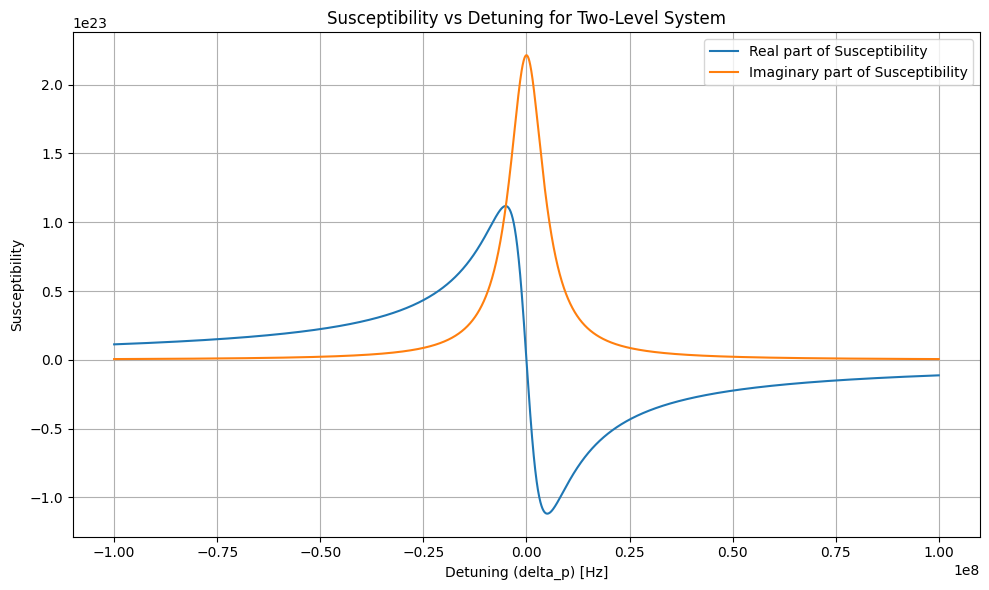

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 변수 값 설정
hbar = 1.0545718e-34  # 플랑크 상수 (J·s)
Omega_p = 1e6  # Rabi 주파수 (Hz)
Gamma_e = 1e7  # 붕괴율 (Hz)
gamma_p = 1e3  # 상호작용 탈상관율 (Hz)
epsilon_0 = 8.854e-12  # 진공 유전율 (F/m)
N = 1e10  # 원자 수
V = 1e-3  # 부피 (m^3)
d_eg = 1e-29  # 쌍극자 모멘트 (C·m)
omega_p = 2 * np.pi * 1e9  # 주파수 (Hz)
d = 1e-2  # 물질 두께 (m)

# delta_p 값의 범위 설정
delta_p_vals = np.linspace(-100e6, 100e6, 4000)  # -10 MHz에서 10 MHz까지

# rho_eg 계산
def calculate_rho_eg(delta_p, Omega_p, Gamma_e, gamma_p):
    numerator = Omega_p * (delta_p - 1j * (Gamma_e / 2 + gamma_p))
    denominator = Omega_p**2 / 2 + (Gamma_e / 2 + gamma_p)**2 + delta_p**2
    return numerator / denominator

# 전기 감수율 χ 계산
def calculate_susceptibility(rho_eg, N, V, d_eg, epsilon_0):
    N_over_V = N / V
    P = -N_over_V * (d_eg * rho_eg)
    chi = P / (epsilon_0 * d_eg)
    return chi

# 전기 감수율 및 투과율 계산
susceptibility_vals_real = []
susceptibility_vals_imag = []
transmission_vals = []

for delta_p in delta_p_vals:
    rho_eg = calculate_rho_eg(delta_p, Omega_p, Gamma_e, gamma_p)
    chi = calculate_susceptibility(rho_eg, N, V, d_eg, epsilon_0)
    
    susceptibility_vals_real.append(float(sp.re(chi)))
    susceptibility_vals_imag.append(float(sp.im(chi)))

    # 복소 유전율 계산
    epsilon = epsilon_0 * (1 + chi)
    n_complex = sp.sqrt(epsilon / epsilon_0)

    # 감쇠 상수 계산
    k = float(sp.im(n_complex))

    # 투과율 계산
    T = np.exp(-2 * k * d)
    transmission_vals.append(T)

# 그래프 그리기
plt.figure(figsize=(10, 6))


plt.plot(delta_p_vals, susceptibility_vals_real, label='Real part of Susceptibility')
plt.plot(delta_p_vals, susceptibility_vals_imag, label='Imaginary part of Susceptibility')
plt.xlabel('Detuning (delta_p) [Hz]')
plt.ylabel('Susceptibility')
plt.title('Susceptibility vs Detuning for Two-Level System')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


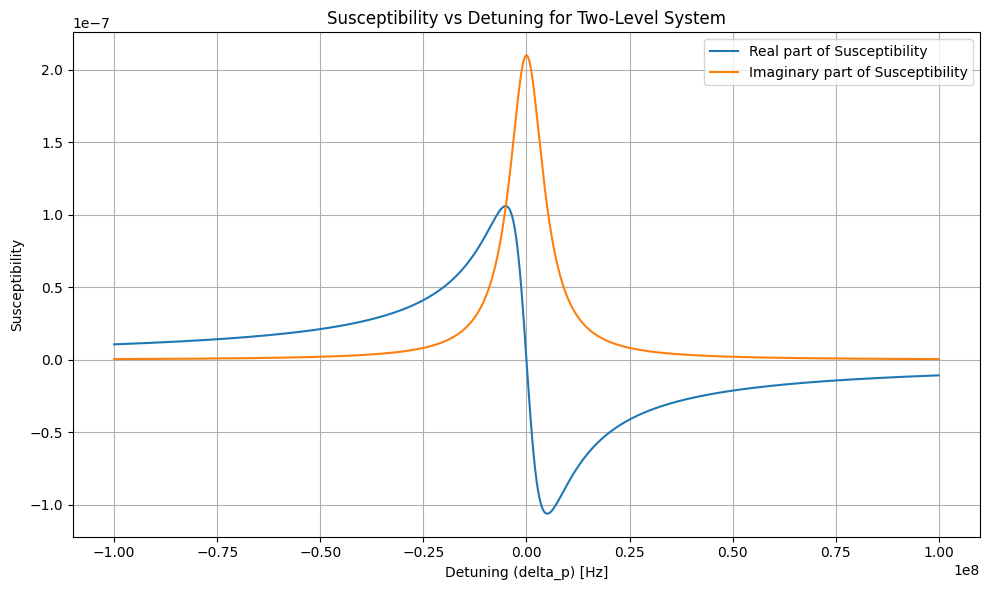

In [13]:
# https://pubs.aip.org/aip/adv/article/10/2/025106/1021638/A-short-introduction-to-the-Lindblad-master
# [A short introduction to the Lindbald master equation] 논문을 참조한 density matrix에 대한 susceptibility

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 변수 값 설정
hbar = 1.0545718e-34  # 플랑크 상수 (J·s)
Omega = 1e6  # Rabi 주파수 (Hz)
Gamma = 1e7  # 붕괴율 (Hz)
gamma_p = 1e3  # 상호작용 탈상관율 (Hz)
epsilon_0 = 8.854e-12  # 진공 유전율 (F/m)
N = 1e10  # 원자 수
V = 1e-3  # 부피 (m^3)
d_eg = 1e-29  # 쌍극자 모멘트 (C·m)
omega_p = 2 * np.pi * 1e9  # 주파수 (Hz)
d = 1e-2  # 물질 두께 (m)

# delta_p 값의 범위 설정
delta_p_vals = np.linspace(-100e6, 100e6, 4000)  # -10 MHz에서 10 MHz까지

# rho_eg 계산
def calculate_rho_eg(delta_p, Omega, Gamma):
    numerator = Omega * (-1j * Gamma + 2 * delta_p)
    denominator = Gamma ** 2 + 2 * Omega**2 + 4*delta_p**2
    return numerator / denominator

# 전기 감수율 χ 계산
def calculate_susceptibility(rho_eg, N, V, d_eg, epsilon_0, Omega_p, hbar):
    numerator = -2 * N * d_eg**2 * rho_eg # N_over_V = N / V
    denominator = Omega * V * epsilon_0 * hbar # P = -N_over_V * (d_eg * rho_eg)
    # chi = P / (epsilon_0 * d_eg)
    return numerator / denominator

# 전기 감수율 및 투과율 계산
susceptibility_vals_real = []
susceptibility_vals_imag = []
transmission_vals = []

for delta_p in delta_p_vals:
    rho_eg = calculate_rho_eg(delta_p, Omega, Gamma)
    chi = calculate_susceptibility(rho_eg, N, V, d_eg, epsilon_0, Omega, hbar)
    
    susceptibility_vals_real.append(float(sp.re(chi)))
    susceptibility_vals_imag.append(float(sp.im(chi)))

    # 복소 유전율 계산
    epsilon = epsilon_0 * (1 + chi)
    n_complex = sp.sqrt(epsilon / epsilon_0)

    # 감쇠 상수 계산
    k = float(sp.im(n_complex))

    # 투과율 계산
    T = np.exp(-2 * k * d)
    transmission_vals.append(T)

# 그래프 그리기
plt.figure(figsize=(10, 6))


plt.plot(delta_p_vals, susceptibility_vals_real, label='Real part of Susceptibility')
plt.plot(delta_p_vals, susceptibility_vals_imag, label='Imaginary part of Susceptibility')
plt.xlabel('Detuning (delta_p) [Hz]')
plt.ylabel('Susceptibility')
plt.title('Susceptibility vs Detuning for Two-Level System')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


# 이제 Doppler effect를 고려한 susceptibility를 구함
- $\delta^D = \delta^0 + k_z v_z$, $\delta^D$는 effective detuning, $\delta^0$은 probe laser의 detuning, $k_z$는 velocity component in the direction of the laser beam
- $N(v_z) = \sqrt{m / 2 \pi k_b T} exp[{- m v^2 / 2 k_b T}]$, $N(v_z)$는 normalized distribution of $v_z$ at $T = 300K$, $m$은 Rb의 mass
- $\chi_{rt} = \int_{v_z} \chi(v_z) N(v_z) d v_z$ , $\chi(v_z)$는 susceptibility were the effective detuning is the parameter that contains $v_z$

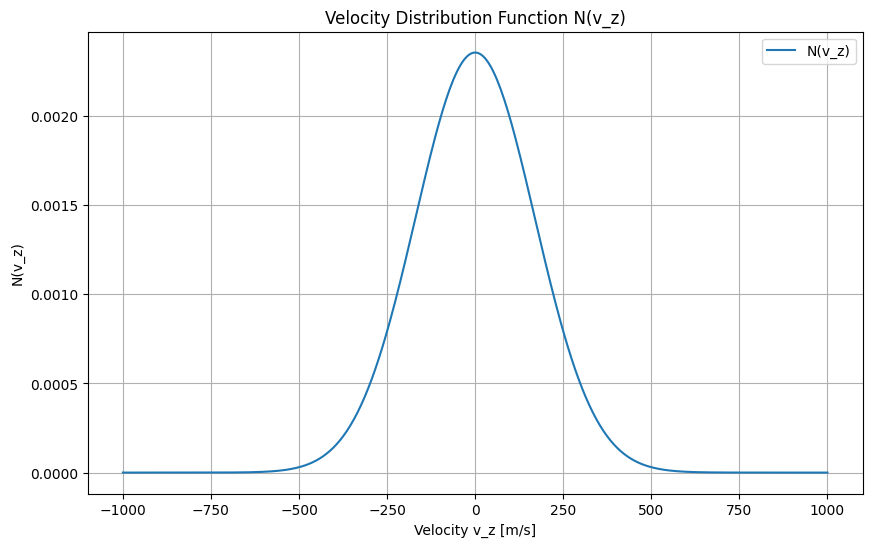

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 상수값 설정
m_Rb = 1.443e-25  # 루비듐 원자 질량 (kg)
k_B = 1.38e-23  # 볼츠만 상수 (J/K)
T = 300  # 온도 (K)

# 속도 분포 함수 N(v_z) 정의
def N_vz(v_z, m_Rb, k_B, T):
    return np.sqrt(m_Rb / (2 * np.pi * k_B * T)) * np.exp(-m_Rb * v_z**2 / (2 * k_B * T))

# 속도 v_z 값의 범위 설정
v_z_vals = np.linspace(-1000, 1000, 400)  # -1000 m/s에서 1000 m/s까지

# N(v_z) 값 계산
N_vz_vals = N_vz(v_z_vals, m_Rb, k_B, T)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(v_z_vals, N_vz_vals, label='N(v_z)')
plt.xlabel('Velocity v_z [m/s]')
plt.ylabel('N(v_z)')
plt.title('Velocity Distribution Function N(v_z)')
plt.legend()
plt.grid(True)
plt.show()


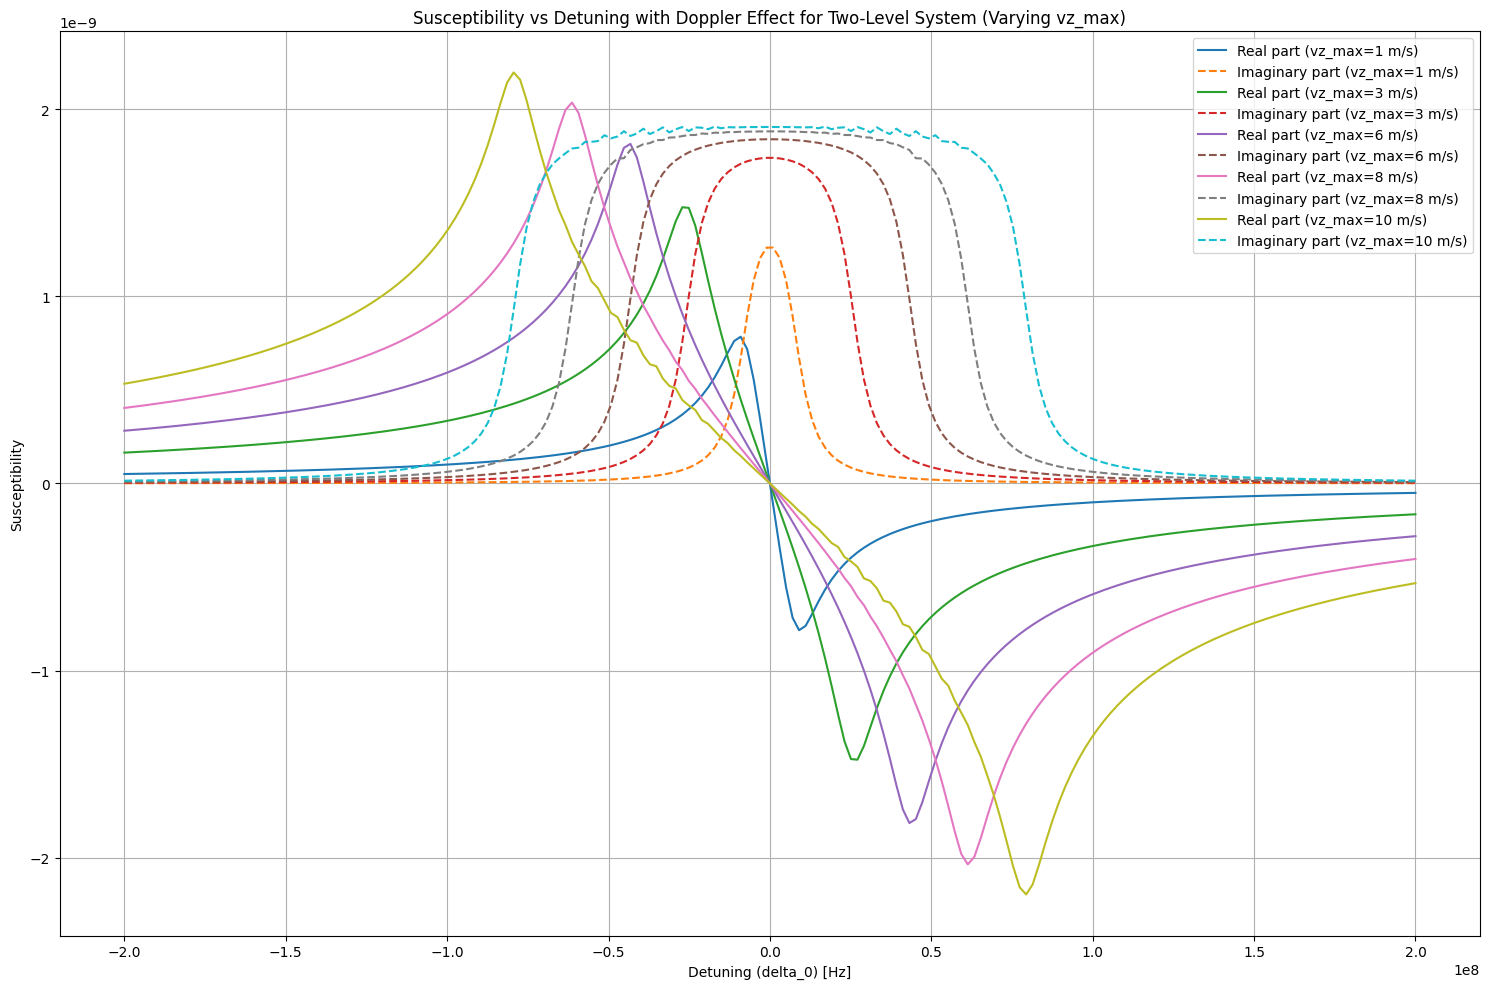

In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 상수값 설정
hbar = 1.0545718e-34  # 플랑크 상수 (J·s)
Omega_p = 1e6  # Rabi 주파수 (Hz)
Gamma_e = 1e7  # 붕괴율 (Hz)
gamma_p = 1e3  # 상호작용 탈상관율 (Hz)
epsilon_0 = 8.854e-12  # 진공 유전율 (F/m)
N = 1e10  # 원자 수
V = 1e-3  # 부피 (m^3)
d_eg = 1e-29  # 쌍극자 모멘트 (C·m)
omega_p = 2 * np.pi * 1e9  # 주파수 (Hz)
lambda_laser = 795e-9  # 레이저 파장 (m)
k_z = 2 * np.pi / lambda_laser  # 레이저 파수 (1/m)
m_Rb = 1.443e-25  # 루비듐 원자 질량 (kg)
k_B = 1.38e-23  # 볼츠만 상수 (J/K)
T = 300  # 온도 (K)

# 속도 분포 함수 N(v_z) 정의
def N_vz(v_z, m_Rb, k_B, T):
    return np.sqrt(m_Rb / (2 * np.pi * k_B * T)) * np.exp(-m_Rb * v_z**2 / (2 * k_B * T))

# Doppler 효과를 고려한 delta^D 계산
def delta_D(delta_0, k_z, v_z):
    return delta_0 + k_z * v_z

# rho_eg 계산
def calculate_rho_eg(delta_D, Omega_p, Gamma_e, gamma_p):
    numerator = Omega_p * (delta_D - 1j * (Gamma_e / 2 + gamma_p))
    denominator = Omega_p**2 / 2 + (Gamma_e / 2 + gamma_p)**2 + delta_D**2
    return numerator / denominator

# 전기 감수율 χ 계산
def calculate_susceptibility(rho_eg, N, V, d_eg, epsilon_0, Omega_p, hbar):
    chi = - (2 * N * d_eg**2 / (epsilon_0 * V * hbar * Omega_p)) * rho_eg
    return chi

# chi_rt 계산
def chi_rt(delta_0, k_z, Omega_p, Gamma_e, gamma_p, N, V, d_eg, epsilon_0, hbar, m_Rb, k_B, T, vz_max):
    integrand_real = lambda v_z: sp.re(calculate_susceptibility(
        calculate_rho_eg(delta_D(delta_0, k_z, v_z), Omega_p, Gamma_e, gamma_p),
        N, V, d_eg, epsilon_0, Omega_p, hbar)) * N_vz(v_z, m_Rb, k_B, T)
    
    integrand_imag = lambda v_z: sp.im(calculate_susceptibility(
        calculate_rho_eg(delta_D(delta_0, k_z, v_z), Omega_p, Gamma_e, gamma_p),
        N, V, d_eg, epsilon_0, Omega_p, hbar)) * N_vz(v_z, m_Rb, k_B, T)
    
    chi_rt_real, _ = quad(integrand_real, -vz_max, vz_max)
    chi_rt_imag, _ = quad(integrand_imag, -vz_max, vz_max)
    
    return chi_rt_real + 1j * chi_rt_imag

# delta_0 값의 범위 설정
delta_0_vals = np.linspace(-200e6, 200e6, 200)  # -200 MHz에서 200 MHz까지

# 속도 적분 구간 설정
vz_max_vals = np.linspace(1, 10, 5)  # 적분 구간 1 m/s에서 10 m/s까지

# 그래프 그리기
plt.figure(figsize=(15, 10))

for vz_max in vz_max_vals:
    susceptibility_rt_vals_real = []
    susceptibility_rt_vals_imag = []
    
    for delta_0 in delta_0_vals:
        chi_rt_val = chi_rt(delta_0, k_z, Omega_p, Gamma_e, gamma_p, N, V, d_eg, epsilon_0, hbar, m_Rb, k_B, T, vz_max)
        
        susceptibility_rt_vals_real.append(float(sp.re(chi_rt_val)))
        susceptibility_rt_vals_imag.append(float(sp.im(chi_rt_val)))
    
    plt.plot(delta_0_vals, susceptibility_rt_vals_real, label=f'Real part (vz_max={vz_max:.0f} m/s)')
    plt.plot(delta_0_vals, susceptibility_rt_vals_imag, linestyle='--', label=f'Imaginary part (vz_max={vz_max:.0f} m/s)')

plt.xlabel('Detuning (delta_0) [Hz]')
plt.ylabel('Susceptibility')
plt.title('Susceptibility vs Detuning with Doppler Effect for Two-Level System (Varying vz_max)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


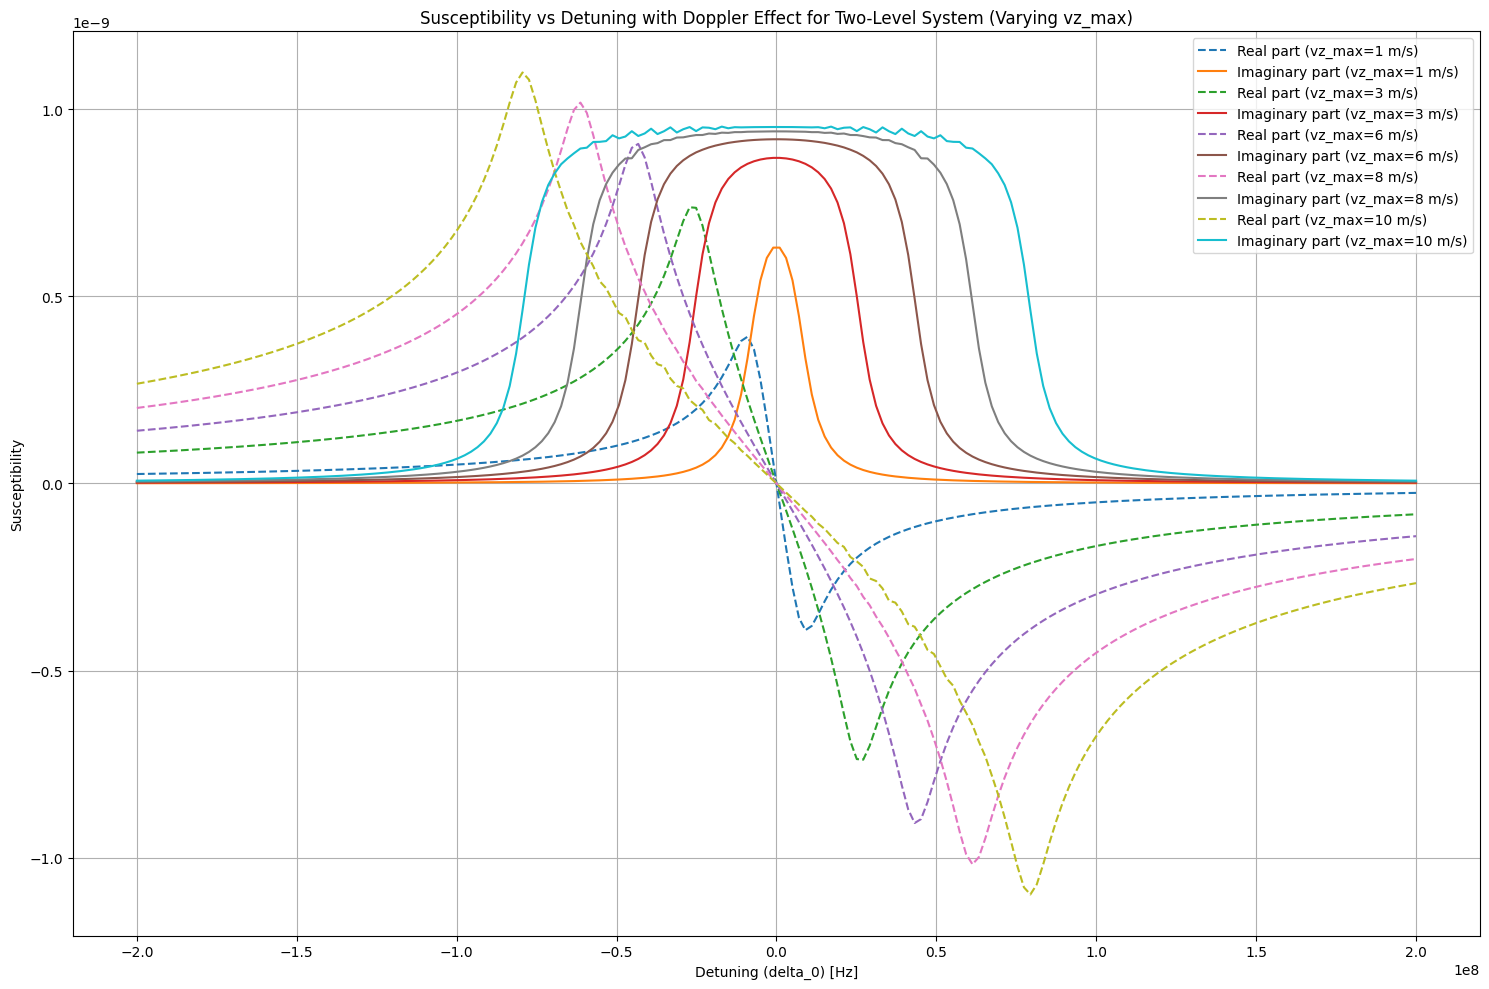

In [14]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 상수값 설정
hbar = 1.0545718e-34  # 플랑크 상수 (J·s)
Omega = 1e6  # Rabi 주파수 (Hz)
Gamma = 1e7  # 붕괴율 (Hz)
gamma_p = 1e3  # 상호작용 탈상관율 (Hz)
epsilon_0 = 8.854e-12  # 진공 유전율 (F/m)
N = 1e10  # 원자 수
V = 1e-3  # 부피 (m^3)
d_eg = 1e-29  # 쌍극자 모멘트 (C·m)
omega_p = 2 * np.pi * 1e9  # 주파수 (Hz)
lambda_laser = 795e-9  # 레이저 파장 (m)
k_z = 2 * np.pi / lambda_laser  # 레이저 파수 (1/m)
m_Rb = 1.443e-25  # 루비듐 원자 질량 (kg)
k_B = 1.38e-23  # 볼츠만 상수 (J/K)
T = 300  # 온도 (K)

# 속도 분포 함수 N(v_z) 정의
def N_vz(v_z, m_Rb, k_B, T):
    return np.sqrt(m_Rb / (2 * np.pi * k_B * T)) * np.exp(-m_Rb * v_z**2 / (2 * k_B * T))

# Doppler 효과를 고려한 delta^D 계산
def delta_D(delta_0, k_z, v_z):
    return delta_0 + k_z * v_z

# rho_eg 계산
def calculate_rho_eg(delta_p, Omega, Gamma):
    numerator = Omega * (-1j * Gamma + 2 * delta_p)
    denominator = Gamma ** 2 + 2 * Omega**2 + 4*delta_p**2
    return numerator / denominator

# 전기 감수율 χ 계산
def calculate_susceptibility(rho_eg, N, V, d_eg, epsilon_0, Omega_p, hbar):
    numerator = -2 * N * d_eg**2 * rho_eg # N_over_V = N / V
    denominator = Omega * V * epsilon_0 * hbar # P = -N_over_V * (d_eg * rho_eg)
    # chi = P / (epsilon_0 * d_eg)
    return numerator / denominator

# chi_rt 계산
def chi_rt(delta_0, k_z, Omega, Gamma, N, V, d_eg, epsilon_0, hbar, m_Rb, k_B, T, vz_max):
    integrand_real = lambda v_z: sp.re(calculate_susceptibility(
        calculate_rho_eg(delta_D(delta_0, k_z, v_z), Omega, Gamma),
        N, V, d_eg, epsilon_0, Omega, hbar)) * N_vz(v_z, m_Rb, k_B, T)
    
    integrand_imag = lambda v_z: sp.im(calculate_susceptibility(
        calculate_rho_eg(delta_D(delta_0, k_z, v_z), Omega, Gamma),
        N, V, d_eg, epsilon_0, Omega, hbar)) * N_vz(v_z, m_Rb, k_B, T)
    
    chi_rt_real, _ = quad(integrand_real, -vz_max, vz_max)
    chi_rt_imag, _ = quad(integrand_imag, -vz_max, vz_max)
    
    return chi_rt_real + 1j * chi_rt_imag

# delta_0 값의 범위 설정
delta_0_vals = np.linspace(-200e6, 200e6, 200)  # -200 MHz에서 200 MHz까지

# 속도 적분 구간 설정
vz_max_vals = np.linspace(1, 10, 5)  # 적분 구간 1 m/s에서 10 m/s까지

# 그래프 그리기
plt.figure(figsize=(15, 10))

for vz_max in vz_max_vals:
    susceptibility_rt_vals_real = []
    susceptibility_rt_vals_imag = []
    
    for delta_0 in delta_0_vals:
        chi_rt_val = chi_rt(delta_0, k_z, Omega, Gamma, N, V, d_eg, epsilon_0, hbar, m_Rb, k_B, T, vz_max)
        
        susceptibility_rt_vals_real.append(float(sp.re(chi_rt_val)))
        susceptibility_rt_vals_imag.append(float(sp.im(chi_rt_val)))
    
    plt.plot(delta_0_vals, susceptibility_rt_vals_real, linestyle='--', label=f'Real part (vz_max={vz_max:.0f} m/s)')
    plt.plot(delta_0_vals, susceptibility_rt_vals_imag, label=f'Imaginary part (vz_max={vz_max:.0f} m/s)')

plt.xlabel('Detuning (delta_0) [Hz]')
plt.ylabel('Susceptibility')
plt.title('Susceptibility vs Detuning with Doppler Effect for Two-Level System (Varying vz_max)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Quantum Optics 5.7.6.2 Lamb Dip
- 이것은 SAS 선폭을 그리는 코드
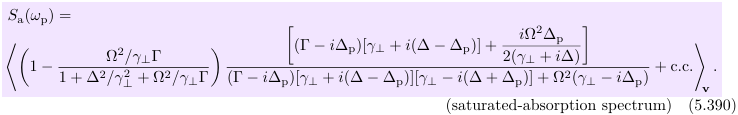
- 이 식은 Mollow's formula (5.369) for the probe-absorption spectrum, writing $\rho_{ee}(t \rightarrow \inf)$ explicitly using Eq. (5.132)로 유도할 수 있음
- 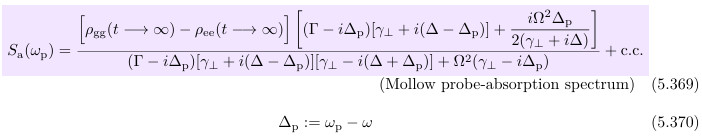
- 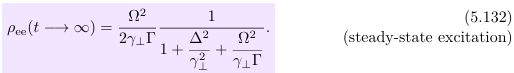
- angle bracket은 average over the atomic velocity distribution을 나타냄
- $\Delta = \omega - \omega_{0}$ : pump detuning from resonance
- $\Delta_p = \omega_p - \omega$ : probe detuning from the pump
- 이런 frequency들은 Doppler shift에 의한 atomic velocity에 의존해서 average를 하는 것임

- Doppler shift는 $\delta \omega = -k \cdot x$. 왜냐면 plane wave는 $E_0 cos(k \cdot x - \omega t)$ , position은 $x(t) = x_0 + \int^t_{0} dt^{'} v(t^{'})$
- 이 식을 보면 atom의 position은 time-dependent. 그래서 plane wave의 시간 term에도 추가적인 term이 들어가게 됨
- In the moving frame, effective frequency는 plane-wave phase의 time derivative이다: $\omega_v=-\partial_t \phi = \omega -k \cdot v $
- 이렇게 되서 Doppler  shift는 time-varying velocity임.
- 그래서 pump field의 Doppler shift는 다음과 같이 나타낼 수 있음.  $\Delta \rightarrow \Delta - k_{pump} \cdot v = \Delta - k \cdot v$
- probe field의 경우 detuning이 pump field와 연관이 되어 있으니까 얘도 바뀜. $\Delta_p \rightarrow \Delta_p + k_{pump} \cdot v - k_{probe} \cdot v \approx \Delta_p + 2k \cdot v$
- pump와 probe wave vector를 구분하지 않음 ($|\Delta_p| \ll \omega_0)$ and 정확히는 pump와 probe field가 counterpropagating하게 진행한다고 함
#### (5.395)와 (5.396)을 대체한 후에 Eq.(5.390)의 결과를 얻음
$

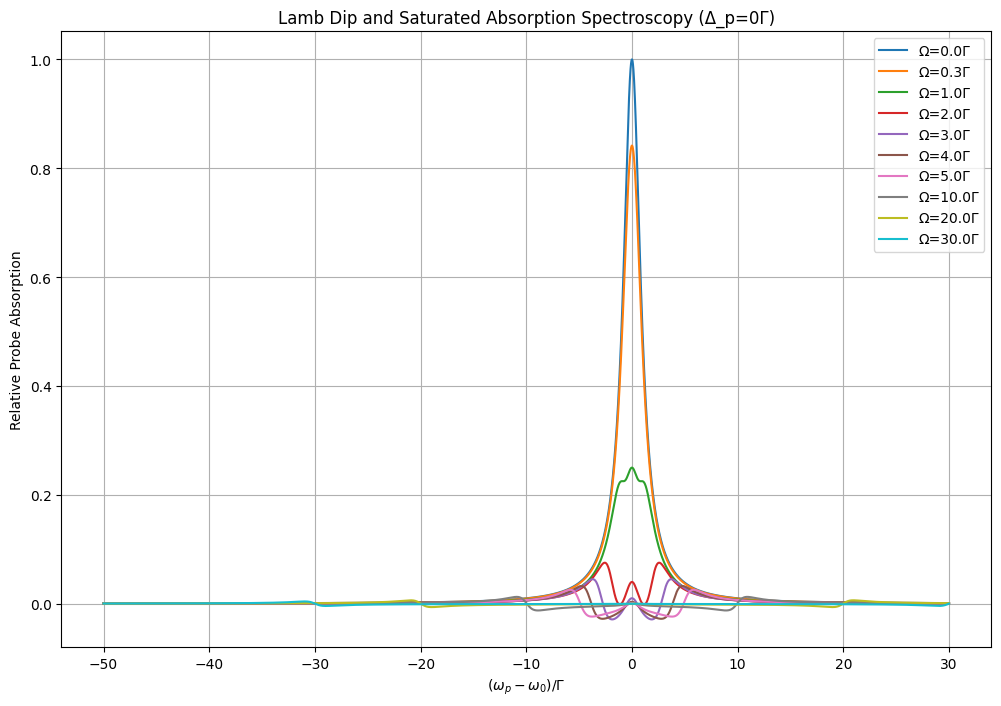

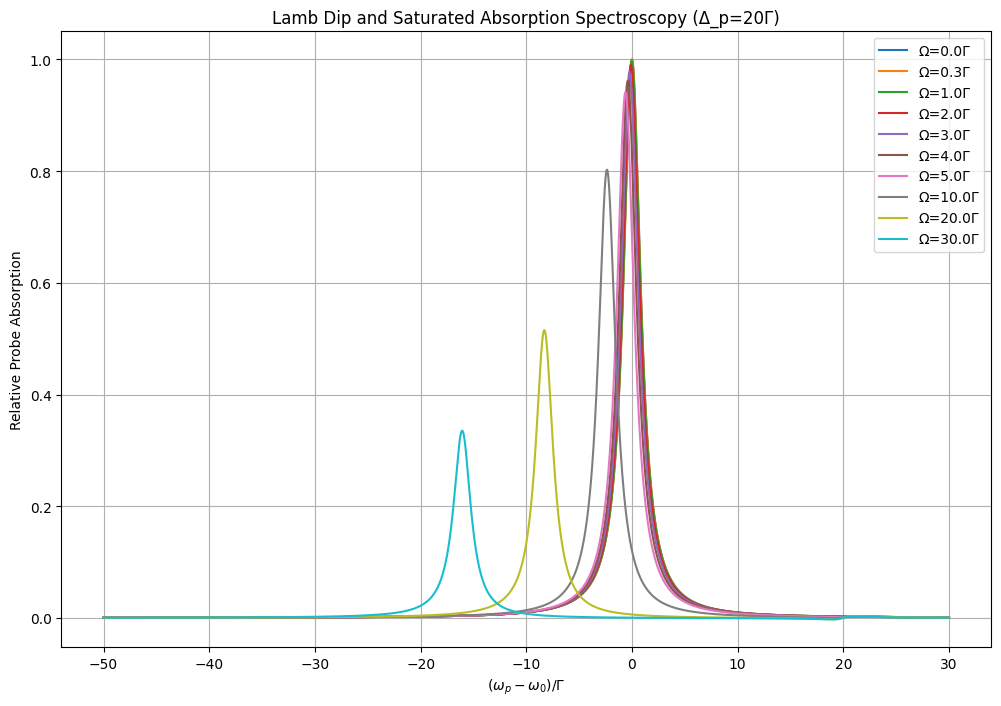

In [32]:
# 이 그래프는 Mollow triplet에 대한 그래프로서 SAS그래프는 아님
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 상수값 설정
Gamma = 1  # 단위 비율 (1/s)
Omega_vals = np.array([0, 0.3, 1, 2, 3, 4, 5, 10, 20, 30]) * Gamma  # Rabi 주파수
gamma_perpendicular = Gamma  # 탈동조율
omega_0 = 0  # 기준 주파수
omega = 0  # 현재 주파수
Delta_p_vals = np.array([0, 20]) * Gamma  # 탐침 레이저 디튜닝

# Saturated Absorption Spectrum 계산
def Sa(omega_p, Omega, Gamma, gamma_perpendicular, omega, omega_0):
    Delta = omega - omega_0
    Delta_p = omega_p - omega
    numerator = Omega**2 / (gamma_perpendicular * Gamma)
    denominator = 1 + (Delta**2 / gamma_perpendicular**2) + (Omega**2 / (gamma_perpendicular * Gamma))
    rho_ee = numerator / denominator
    
    term1 = (Gamma - 1j * Delta_p) * (gamma_perpendicular + 1j * (Delta - Delta_p)) + 1j * Omega**2 * Delta_p / (2 * (gamma_perpendicular + 1j * Delta))
    term2 = (Gamma - 1j * Delta_p) * (gamma_perpendicular + 1j * (Delta - Delta_p)) * (gamma_perpendicular - 1j * (Delta + Delta_p))
    term3 = Omega**2 * (gamma_perpendicular - 1j * Delta_p)
    spectrum = ((1 - rho_ee) * term1 / (term2 + term3)).real
    return spectrum

# 주파수 범위 설정
omega_p_vals = np.linspace(-50 * Gamma, 30 * Gamma, 5000)

# 그래프 그리기: Delta_p = 0
plt.figure(figsize=(12, 8))

for Omega_val in Omega_vals:
    Sa_vals = Sa(omega_p_vals, Omega_val, Gamma, gamma_perpendicular, omega, omega_0)
    plt.plot(omega_p_vals / Gamma, Sa_vals, label=f'Ω={Omega_val/Gamma:.1f}Γ')

plt.xlabel('$(ω_p - ω_0) / Γ$')
plt.ylabel('Relative Probe Absorption')
plt.title('Lamb Dip and Saturated Absorption Spectroscopy (Δ_p=0Γ)')
plt.legend()
plt.grid(True)
plt.show()

# 그래프 그리기: Delta_p = 20 Gamma
plt.figure(figsize=(12, 8))

for Omega_val in Omega_vals:
    Sa_vals = Sa(omega_p_vals, Omega_val, Gamma, gamma_perpendicular, omega + 20 * Gamma, omega_0)
    plt.plot(omega_p_vals / Gamma, Sa_vals, label=f'Ω={Omega_val/Gamma:.1f}Γ')

plt.xlabel('$(ω_p - ω_0) / Γ$')
plt.ylabel('Relative Probe Absorption')
plt.title('Lamb Dip and Saturated Absorption Spectroscopy (Δ_p=20Γ)')
plt.legend()
plt.grid(True)
plt.show()


# 자세한 것은 5.7.6 Probe absorption을 읽어보자
- [B. R. Mollow, "Stimulated emission and absorption near resonance for driven systems", Physical Review A, 5, 2217 (1972) (doi: 10.1103/PhysRevA.5.2217) (Eqs. 3.8, 3.11a)]를 보고 왜 Mollow triplet이 저렇게 나오는지 확인하면 됨

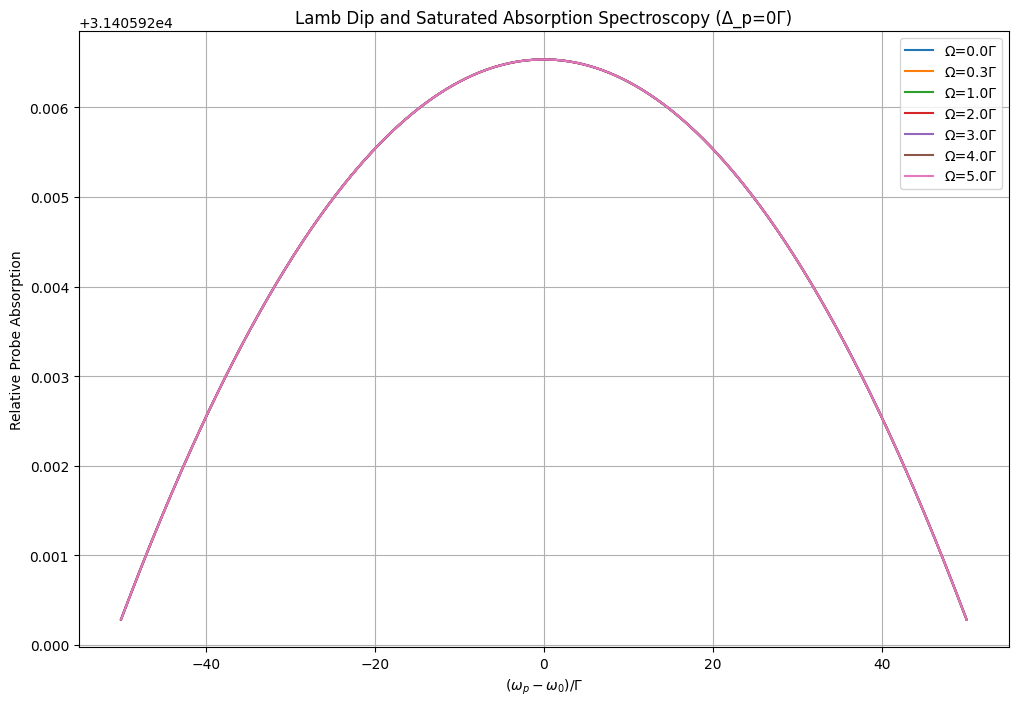

C:\Users\tjdgu\AppData\Local\Temp\ipykernel_17752\253881597.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, -1000, 1000)


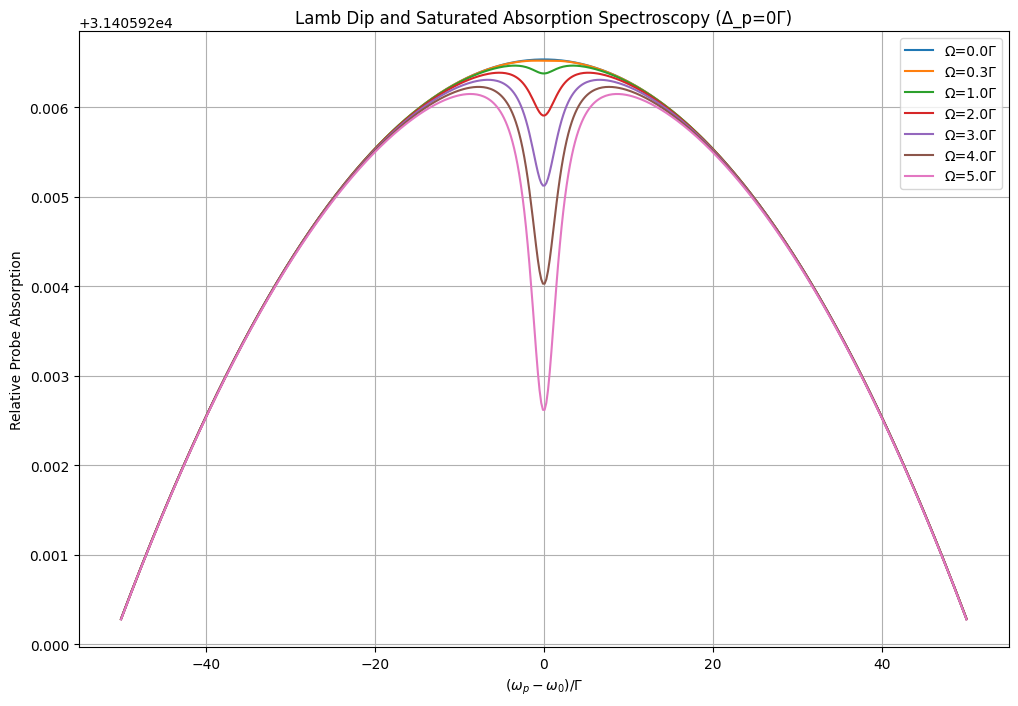

In [11]:
# Sa(0)은 Doppler-broadened absorption line, Sa(2)는 Lamb dip
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 상수값 설정
Gamma = 1  # 단위 비율 (1/s)
gamma_perpendicular = Gamma  # 탈동조율
k = 1  # 파수 벡터 (단위 벡터로 가정)
omega_0 = 0  # 기준 주파수
omega = 0  # 현재 주파수
v_vals = np.linspace(-500, 500, 5000)  # 속도 분포 (가우시안으로 가정)
Omega_vals = np.array([0, 0.3, 1, 2, 3, 4, 5]) * Gamma  # Rabi 주파수

# 속도 분포 함수 N(v_z) 정의 (정규화된 가우시안 분포)
def N_vz(v, m_Rb=1, k_B=1, T=1):
    return np.sqrt(m_Rb / (2 * np.pi * k_B * T)) * np.exp(-m_Rb * v**2 / (2 * k_B * T))

# Sa(0) 계산
def Sa_0(omega_p, Delta_p, Gamma, gamma_perpendicular, k, omega_0, omega):
    def integrand(v):
        Delta = omega - omega_0 - k * v
        Delta_p = omega_p - omega + 2 * k * v
        return (2 * gamma_perpendicular) / ((gamma_perpendicular**2 + (Delta + Delta_p + k * v)**2)) * 10000
    
    result, _ = quad(integrand, -1000, 1000)
    return result

# Sa(2) 계산
def Sa_2(omega_p, Delta_p, Gamma, gamma_perpendicular, k, Omega, omega_0, omega):
    def integrand(v):
        Delta = omega - omega_0 - k * v
        Delta_p = omega_p - omega + 2 * k * v
        Omega = 0.01
        term1 = (2 * gamma_perpendicular**2) / ((Gamma * (gamma_perpendicular**2 + (Delta - k * v)**2)) * (gamma_perpendicular**2 + (Delta + Delta_p + k * v)**2))
        term2 = (1j * (Delta_p + 2 * k * v)) / (2 * (gamma_perpendicular + 1j * (Delta - k * v)) * (Gamma - 1j * (Delta_p + 2 * k * v)) * (gamma_perpendicular + 1j * (Delta - Delta_p - 3 * k * v)) * (gamma_perpendicular - 1j * (Delta + Delta_p + k * v)))
        term3 = (gamma_perpendicular - 1j * (Delta_p + 2 * k * v)) / ((Gamma - 1j * (Delta_p + 2 * k * v)) * (gamma_perpendicular + 1j * (Delta - Delta_p - 3 * k * v)) * (gamma_perpendicular - 1j * (Delta + Delta_p + k * v))**2)
        return (-term1 + term2 - term3) * Omega**2
    
    result, _ = quad(integrand, -1000, 1000)
    return Omega**2 * result

# 주파수 범위 설정
omega_p_vals = np.linspace(-50 * Gamma, 50 * Gamma, 500)

# 그래프 그리기: Delta_p = 0
plt.figure(figsize=(12, 8))

for Omega_val in Omega_vals:
    Sa_0_vals = [Sa_0(omega_p, 0, Gamma, gamma_perpendicular, k, omega_0, omega) for omega_p in omega_p_vals]
    
    Sa_vals = np.array(Sa_0_vals)
    plt.plot(omega_p_vals / Gamma, Sa_vals, label=f'Ω={Omega_val/Gamma:.1f}Γ')

plt.xlabel('$(ω_p - ω_0) / Γ$')
plt.ylabel('Relative Probe Absorption')
plt.title('Lamb Dip and Saturated Absorption Spectroscopy (Δ_p=0Γ)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
for Omega_val in Omega_vals:
    Sa_0_vals = [Sa_0(omega_p, 0, Gamma, gamma_perpendicular, k, omega_0, omega) for omega_p in omega_p_vals]
    Sa_2_vals = [Sa_2(omega_p, 0, Gamma, gamma_perpendicular, k, Omega_val, omega_0, omega) for omega_p in omega_p_vals]
    Sa_vals = np.array(Sa_0_vals) + np.array(Sa_2_vals)
    plt.plot(omega_p_vals / Gamma, Sa_vals, label=f'Ω={Omega_val/Gamma:.1f}Γ')

plt.xlabel('$(ω_p - ω_0) / Γ$')
plt.ylabel('Relative Probe Absorption')
plt.title('Lamb Dip and Saturated Absorption Spectroscopy (Δ_p=0Γ)')
plt.legend()
plt.grid(True)
plt.show()

# 5.7.4 Mollow Triplet
- Mollow가 계산한 Mollow spectrum
- OBE 식을 써서 하고 transverse Bloch-vector component 대신에 complex coherence를 유지
- spectrum의 incoherent part를 계산할 필요가 있어서 atomic operator의 fluctutation part를 treat해야함 ![image.png](attachment:7f4d2dd4-0f13-4137-964c-9c06ebed8dee.png)
- ![image.png](attachment:fb0609a2-9b8a-46d6-aaf1-06c6bdbe942c.png)
- quantum regression theorem을 써서 추가적으로 계산함
- ![image.png](attachment:24b77bbf-1f5b-4001-8201-e79b0396294d.png)